## **Visualizations for Phase 2**

### Visual 1:

Question: Would it be possible to predict approximate wildfire locations based on certain features of the data, such as scan, longitude, latitude, and brightness?

This visual will show which features are most strongly correlated with one another, highlighting any potential relationships between geographic and fire-specific variables that might be used to predict wildfire locations.

In [ ]:
# select only numeric columns from euro_c_df_cleaned
numeric_df = euro_c_df_cleaned.select_dtypes(include=[float, int])

# calculate the correlation matrix
corr_matrix = numeric_df.corr()

# plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of All Numerical Variables in euro_c_df")
plt.show()

### Visual 2:

Question: Are wildfires more common during certain times of the year? Can we predict wildfire location and severity based on the time of year?


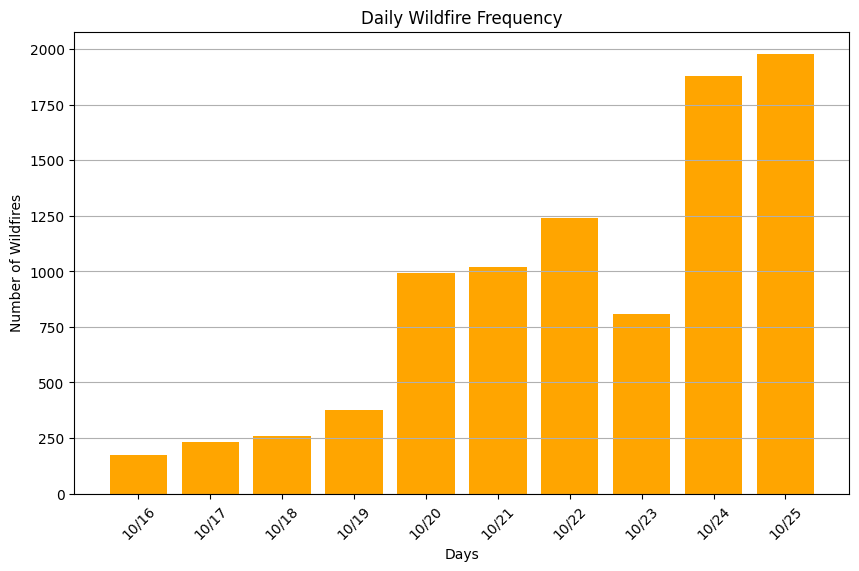

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

key = '996b2af0b72c07a0264d19e7d07e2bd5'

# the df will be replaced with our cleaned df soon we were just having some issues with our API

# last 10 days of all of mainland Europe (based on bounding region coordinates 36,-10,40,71)
area_url = f'https://firms.modaps.eosdis.nasa.gov/api/area/csv/{key}/VIIRS_NOAA20_NRT/36,-10,40,71/10'
df_area = pd.read_csv(area_url)

# acquisition date to datetime format
df_area['acq_date'] = pd.to_datetime(df_area['acq_date'])

# count occurrences per day
daily_fire_counts = df_area['acq_date'].value_counts().sort_index()

# bar chart of monthly wildfire frequency
plt.figure(figsize=(10, 6))
plt.bar(daily_fire_counts.index.strftime('%m/%d'), daily_fire_counts.values, color='orange')
plt.title('Daily Wildfire Frequency')
plt.xlabel('Days')
plt.ylabel('Number of Wildfires')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()